<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#Fake-dataset-of-flower" data-toc-modified-id="Fake-dataset-of-flower-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fake dataset of flower</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Deep-Learning-Method-(tanh-and-sigmoid)" data-toc-modified-id="Deep-Learning-Method-(tanh-and-sigmoid)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Deep Learning Method (tanh and sigmoid)</a></span></li><li><span><a href="#Intialize-W-to-small-number-and-b-to-zeros" data-toc-modified-id="Intialize-W-to-small-number-and-b-to-zeros-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Intialize W to small number and b to zeros</a></span></li><li><span><a href="#Forward-propagation" data-toc-modified-id="Forward-propagation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forward propagation</a></span></li><li><span><a href="#Cost" data-toc-modified-id="Cost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cost</a></span></li><li><span><a href="#Backward-Propagation" data-toc-modified-id="Backward-Propagation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Backward Propagation</a></span></li><li><span><a href="#Update-Parameters" data-toc-modified-id="Update-Parameters-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Update Parameters</a></span></li></ul></div>

# imports

In [9]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [59]:
import pandas as pd
import seaborn as sns

In [2]:
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [3]:
# Local imports

In [4]:
from testCases_v2 import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [5]:
import watermark
%load_ext watermark
%watermark -iv

autopep8   1.4.3
matplotlib 3.0.1
watermark  1.8.1
sklearn    0.20.1
json       2.0.9
numpy      1.15.4



# Fake dataset of flower

In [54]:
X, Y = load_planar_dataset()
data = np.concatenate((X,Y),axis=0).T
X.shape, Y.shape, data.shape

((2, 400), (1, 400), (400, 3))

In [90]:
df = pd.DataFrame(data, columns=['X0','X1','Y'])
df.head().append(df.tail())

X0        X1    Y
0    1.204442  3.576114  0.0
1    0.158710 -1.482171  0.0
2    0.095247 -1.279955  0.0
3    0.349178 -2.064380  0.0
4    0.694150  2.889109  0.0
395  0.450368  2.408121  1.0
396  0.037573  0.891601  1.0
397  0.213641  1.732016  1.0
398  0.324387 -2.116325  1.0
399  0.730781  3.068329  1.0

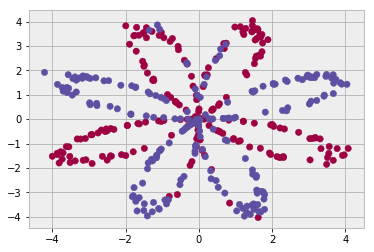

In [58]:
plt.scatter(X[0, :], X[1, :], c=Y.squeeze(), s=40, cmap=plt.cm.Spectral);

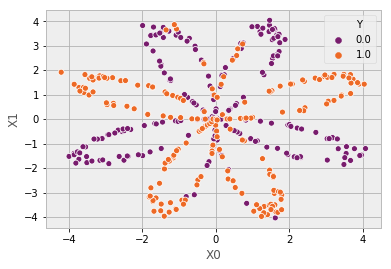

In [92]:
sns.scatterplot('X0','X1',data=df,hue='Y',palette='inferno')

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/pandas/plotting/_core.py:211: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


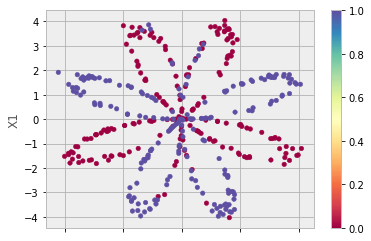

In [86]:
df.plot.scatter(x='X0',y='X1',color=df.Y.astype(int),cmap=plt.cm.Spectral)

# Logistic Regression

In [95]:
clf = sklearn.linear_model.LogisticRegressionCV(cv=5);
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [102]:
# Print accuracy
LR_predictions = clf.predict(X.T)
np.sum(LR_predictions == Y) / len(Y.T) * 100

47.0

In [106]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [117]:
X = X.T
Y = Y.T
X.shape

(400, 2)

In [118]:
def logistic_regression_decision_boundary_plotly(X,Y,clf):
    """Plot decision boundary for logistic regression.
    
    Example:
    iris = sns.load_dataset('iris')
    X = iris.iloc[:, :2]  # Take only the first two features.
    y = iris.species


    from sklearn.preprocessing import StandardScaler
    X = StandardScaler().fit_transform(X)

    logistic_regression_decision_boundary_plotly(X,y,clf)
    
    Also:
    clf = sklearn.linear_model.LogisticRegressionCV(cv=5)
    clf.fit(X, Y.ravel())
    
    """

    # step size in the mesh
    h = .02  

    # boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                         , np.arange(y_min, y_max, h))
    y_ = np.arange(y_min, y_max, h)

    # prediction
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # traces
    trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                      colorscale='Viridis',
                      showscale=True)

    trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                        mode='markers',
                        showlegend=False,
                        marker=dict(size=10,
                                    color=Y, 
                                    colorscale='Viridis',
                                    line=dict(color='black', width=1))
                        )
    layout= go.Layout(
        autosize= True,
        title= 'Logistic Regression (C=0.01)',
        hovermode= 'closest',
        showlegend= False)

    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)       
    return iplot(fig)


In [119]:
logistic_regression_decision_boundary_plotly(X,Y,clf)

In [129]:
# Interpretation: The dataset is not linearly separable,
# so logistic regression doesn't perform well. 

# Deep Learning Method (tanh and sigmoid)

In [163]:
# Get back original shape
X, Y = load_planar_dataset()

X.shape, Y.shape

((2, 400), (1, 400))

In [164]:
from IPython.display import Image

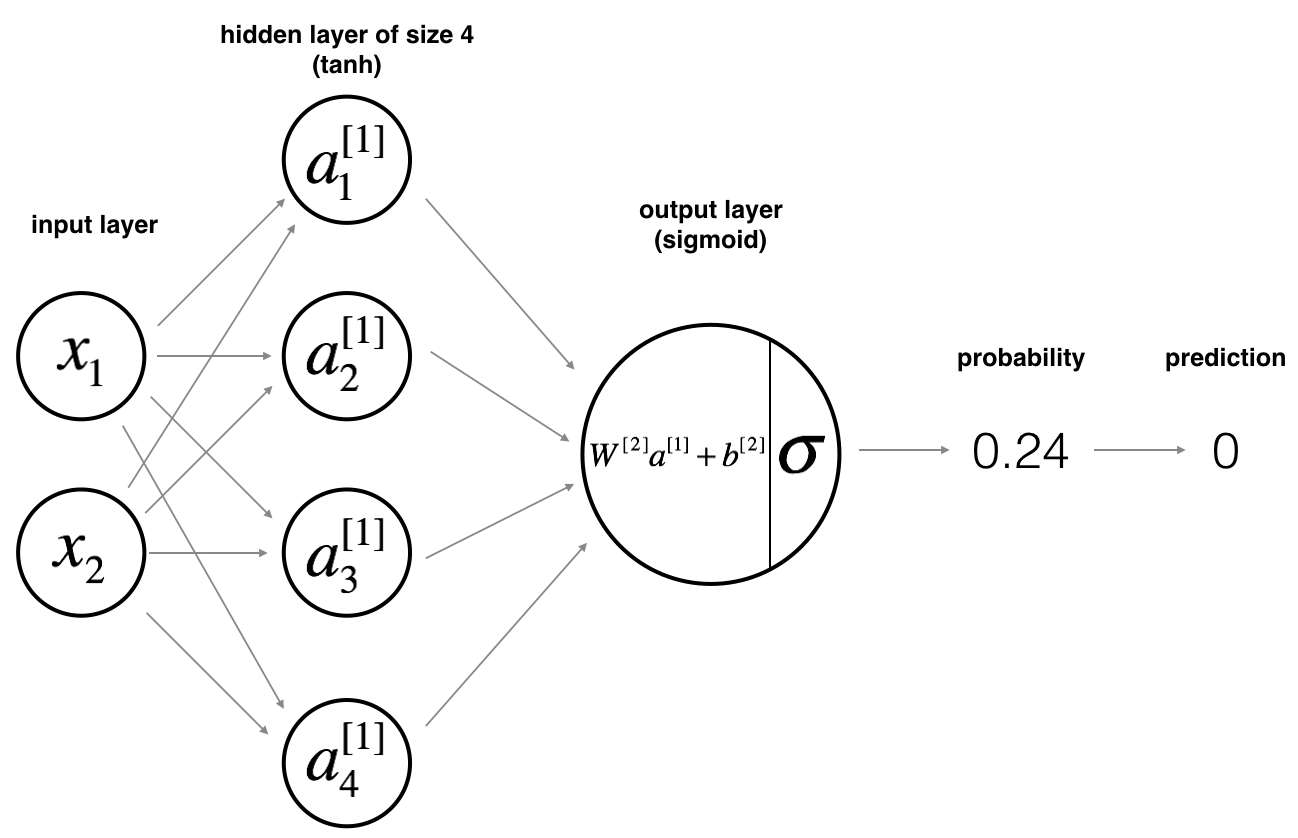

In [165]:
Image('deep_layers.png')

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

In [166]:
# cost

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

# Intialize W to small number and b to zeros

In [167]:
# sizes
n_x = X.shape[0] # size of input layer
n_h = 4          # hidden layers
n_y = Y.shape[0] # size of output layer

n_x, n_h, n_y

(2, 4, 1)

In [168]:
np.random.seed(2)

W1 = np.random.randn(n_h, n_x) * 0.01
b1 = np.zeros(shape=(n_h, 1))
W2 = np.random.randn(n_y, n_h) * 0.01
b2 = np.zeros(shape=(n_y, 1))

# Forward propagation

In [169]:
Z1 = np.dot(W1, X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

# Cost

In [170]:
m = Y.shape[1]

logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
cost = - np.sum(logprobs) / m

cost = np.squeeze(cost)
cost

0.6930480201239823

# Backward Propagation

In [171]:
dZ2= A2 - Y
dW2 = (1 / m) * np.dot(dZ2, A1.T)
db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
dW1 = (1 / m) * np.dot(dZ1, X.T)
db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

# Update Parameters

In [172]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [173]:
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}

In [174]:
grads = {"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}